<a href="https://colab.research.google.com/github/ndan1/final-project-big-data-analysis/blob/main/mainm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats

In [65]:
#read data
data = pd.read_csv('Data_Penjualan_Aki.csv', sep=';')
data

,tanggal,jumlah,namaBarang,pemesan,harga
0,02/07/2022,2,N50Z,Damar,1870800
1,05/07/2022,2,Air Aki Sinar,Global Motor,180000
2,06/07/2022,1,Charger Aki Taff,Palapa IV,200000
3,06/07/2022,1,NX120,Fantusi,2385000
4,06/07/2022,1,GTZ75,Maju Jaya,324000
...,...,...,...,...,...
270,10/07/2024,2,N70,Hasta,2338000
271,10/07/2024,1,NS40Z,Brabus,708000
272,12/07/2024,1,N70,Rian,1124000
273,17/07/2024,2,N120,Arif,3696000


In [68]:
#informasi data
data.info()
data.describe() #statistik deskriptif dari kolom numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tanggal     275 non-null    object
 1   jumlah      275 non-null    int64 
 2   namaBarang  275 non-null    object
 3   pemesan     275 non-null    object
 4   harga       275 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 10.9+ KB


,jumlah,harga
count,275.000000,2.750000e+02
mean,1.450909,2.035903e+06
std,0.566998,1.604694e+06
min,1.000000,1.700000e+05
25%,1.000000,1.000000e+06
50%,1.000000,1.541000e+06
75%,2.000000,2.416000e+06
max,4.000000,9.069000e+06


In [71]:
#klasifikasi data berdasarkan nama barang dan jumlah
barang_laris = data.groupby('namaBarang')['jumlah'].sum().sort_values(ascending=False)

#mengambil 10 paling laku dan tidak laku
top_10_laris = barang_laris.head(10)
bottom_10_laris = barang_laris.tail(10)

In [72]:
print("10 Barang Terlaris:")
print(top_10_laris)

print("\n10 Barang Tidak Laris:")
print(bottom_10_laris)

10 Barang Terlaris:
namaBarang
N100     53
N120     52
N70      42
NS40Z    34
NS60     28
NS70     27
N150     26
N50      21
N200     21
N50Z     20
Name: jumlah, dtype: int64

10 Barang Tidak Laris:
namaBarang
N70ZL               2
NS40                2
Air Aki Sinar       2
R66LNS              1
55D23L              1
NS60Z               1
NS60L               1
GTZ75               1
Charger Aki Taff    1
R8010               1
Name: jumlah, dtype: int64


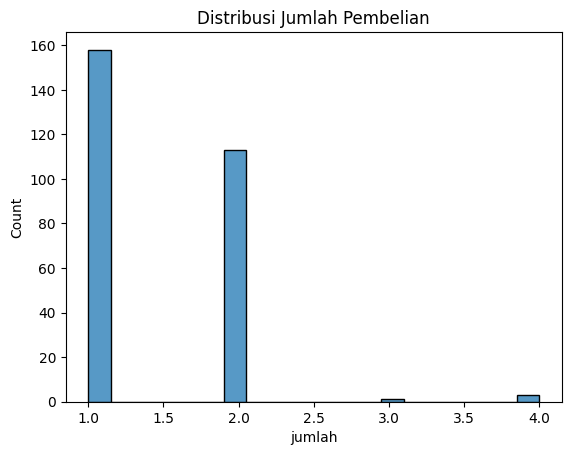

In [69]:
#visualisasi distribusi jumlah pembelian
sns.histplot(data['jumlah'], bins=20)
plt.title('Distribusi Jumlah Pembelian')
plt.show()

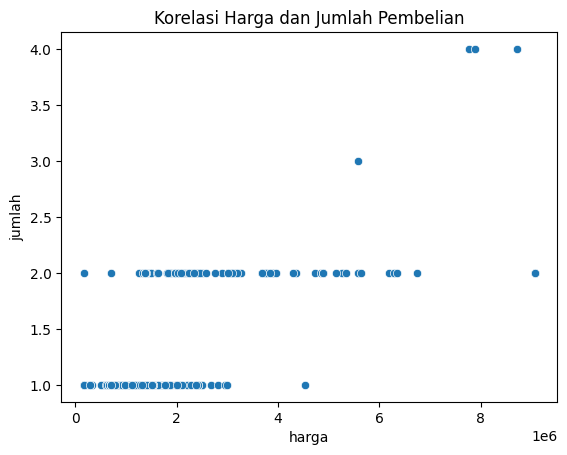

In [70]:
#analisis korelasi antara harga dan jumlah
sns.scatterplot(x='harga', y='jumlah', data=data)
plt.title('Korelasi Harga dan Jumlah Pembelian')
plt.show()

In [73]:
#analisa tren penjualan
data['tanggal'] = pd.to_datetime(data['tanggal'], format='%d/%m/%Y')
penjualan_per_tanggal = data.groupby('tanggal')['jumlah'].sum() # Kelompokkan data berdasarkan tanggal dan jumlahkan

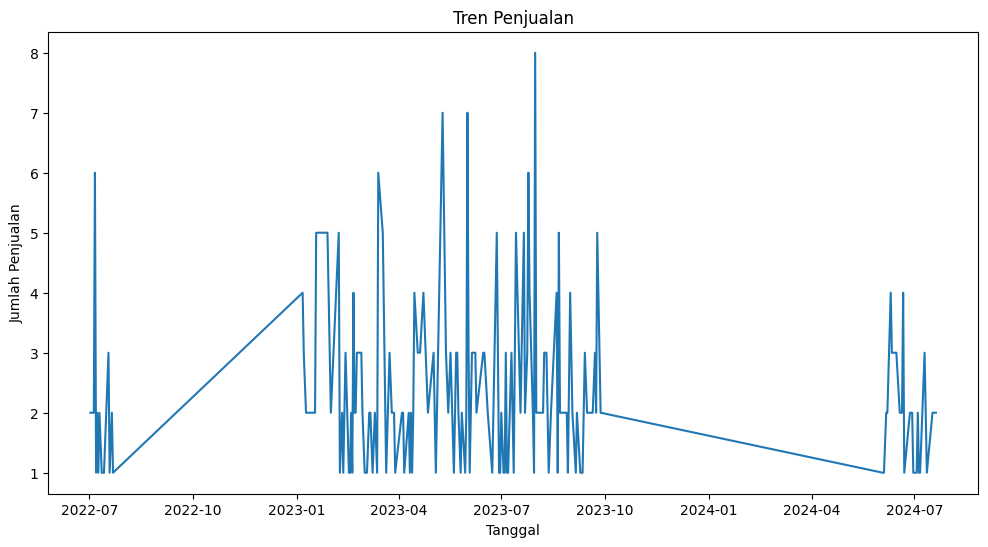

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(penjualan_per_tanggal.index, penjualan_per_tanggal.values)
plt.title('Tren Penjualan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [75]:
#mengelompokkan pelanggan berdasarkan frekuensi pembelian
frekuensi_pembelian = data.groupby('pemesan')['namaBarang'].count()

#kategori kondisi
def segmentasi_pelanggan(x):
    if x > 30:
        return 'Frequent Buyer'
    elif x > 10:
        return 'Occasional Buyer'
    else:
        return 'One-time Buyer'

In [76]:
data['segmentasi'] = data['pemesan'].map(frekuensi_pembelian).map(segmentasi_pelanggan)
print(data[['pemesan', 'segmentasi']])

          pemesan        segmentasi
0           Damar  Occasional Buyer
1    Global Motor    One-time Buyer
2       Palapa IV    One-time Buyer
3         Fantusi  Occasional Buyer
4       Maju Jaya  Occasional Buyer
..            ...               ...
270         Hasta  Occasional Buyer
271        Brabus    One-time Buyer
272          Rian    One-time Buyer
273          Arif    One-time Buyer
274      Juniarta  Occasional Buyer

[275 rows x 2 columns]
